In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 13: HTTP in the Real World

## CHAPTER 1: Deploying to a hosting service

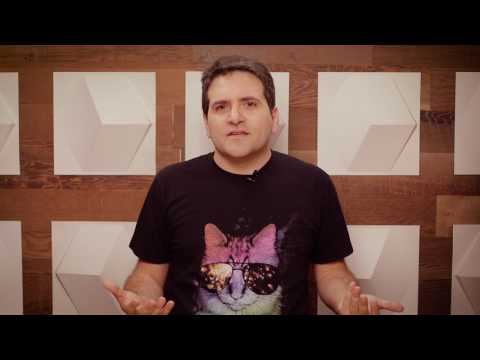

In [2]:
id = 'EV10W-LUwxA'
YouTubeVideo(id=id, width=600)

### Can I just host my web service at home?

Maybe! Plenty of people do, but not everyone can. It's a common hobbyist activity, but not something that people would usually do for a job.

There's nothing fundamentally special about the computers that run web servers. They're just computers running an operating system such as Linux, Mac OS, or Windows (usually Linux). Their connection to the Internet is a little different from a typical home or mobile Internet connection, though. A server usually needs to have a stable (static) IP address so that clients can find it and connect to it. Most home and mobile systems don't assign your computer a static IP address.

Also, most home Internet routers don't allow incoming connections by default. You would need to reconfigure your router to allow it. This is totally possible, but way beyond the scope of this course (and I don't know what kind of router you have).

Lastly, if you run a web service at home, your computer has to be always on.

So, for the next exercise in this course, you'll be deploying one of your existing web services to [Heroku](https://www.heroku.com/), a commercial service that will host it on the web where it will be publicly accessible.

### Steps to deployment
Here's an overview of the steps you'll need to complete. We'll be going over each one in more detail.

1. Check your server code into a new local Git repository.
2. Sign up for a free Heroku account.
3. Download the Heroku [command-line interface](https://devcenter.heroku.com/articles/heroku-cli) (CLI).
4. Authenticate the Heroku CLI with your account: ``heroku login``
5. Create configuration files ``Procfile``, ``requirements.txt``, and ``runtime.txt`` and check them into your Git repository.
6. Modify your server to listen on a configurable port.
7. Create your Heroku app: ``heroku create your-app-name``
8. Push your code to Heroku with Git: ``git push heroku master``

### Check in your code
Heroku (and many other web hosting services) works closely with Git: you can deploy a particular version of your code to Heroku by pushing it with the ``git push`` command. So in order to deploy your code, it first needs to be checked into a local Git repository.

This Git repository should be separate from the one created when you downloaded the exercise code (the ``course-ud303`` directory). Create a new directory outside of that directory and copy the bookmark server code (the file ``BookmarkServer.py`` from last lesson) into it. Then set this new directory up as a Git repository:

* ``git init``
* ``git add BookmarkServer.py``
* ``git commit -m "Checking in my bookmark server!"``

For a refresher on using Git, take a look at [our Git course](https://www.udacity.com/course/how-to-use-git-and-github--ud775).

### Sign up for a free Heroku account

First, visit this link and follow the instructions to sign up for a free Heroku account:
https://signup.heroku.com/dc

Make sure to write down your username and password!

### Install the Heroku CLI and authenticate

You'll need the Heroku [command-line interface](https://devcenter.heroku.com/articles/heroku-cli) (CLI) tool to set up and configure your app. Download and install it now. Once you have it installed, the ``heroku`` command will be available in your shell.

From the command line, use ``heroku login`` to authenticate to Heroku. It will prompt you for your username and password; use the ones that you just set up when you created your account. This command will save your authentication information in a hidden file (``.netrc``) so you will not need to ender your password again on the same computer.

### Create configuration files

There are a few configuration files that Heroku requires for deployment, to tell its servers how to run your application. For the case of the bookmark server, I'll just give you the required content for these files. These are just plain text files and can be created in your favorite text editor.

``runtime.txt`` tells Heroku what version of Python you want to run. [Check the currently supported runtimes in the Heroku documentation; this will change over time!](https://devcenter.heroku.com/articles/python-runtimes) As of early 2017, the currently supported version of Python 3 is ``python-3.6.0``; so this file just needs to contain the text ``python-3.6.0``.

``requirements.txt`` is used by Heroku (through`` pip``) to install dependencies of your application that aren't in the Python standard library. The bookmark server has one of these: the ``requests`` module. We'd like a recent version of that, so this file can contain the text ``requests>=2.12``. This will install version 2.12 or a later version, if one has been released.

``Procfile`` is used by Heroku to specify the command line for running your application. It can support running multiple servers, but in this case we're only going to run a web server. [Check the Heroku documentation about process types for more details](https://devcenter.heroku.com/articles/procfile). If your bookmark server is in ``BookmarkServer.py``, then the contents of Procfile should be ``web: python BookmarkServer.py``.

Create each of these files in the same directory as your code, and commit them all to your Git repository.

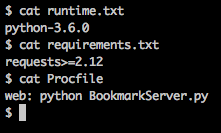
*After creating the configuration files, I check their contents using ``cat``.*
*Here, I'm checking each of ``runtime.txt``, ``requirements.txt``, and ``Procfile``.*

### Listen on a configurable port
There's one small change that you have to make to your server code to make it run on Heroku. The bookmark server from Lesson 2 listens on port 8000. But Heroku runs many users' processes on the same computer, and multiple processes can't (normally) listen on the same port. So Heroku needs to be able to tell your server what port to listen on.

The way it does this is through an environment variable — a configuration variable that is passed to your server from the program that starts it, usually the shell. Python code can access environment variables in the ``os.environ`` dictionary. The names of environment variables are usually capitalized; and the environment variable we need here is called, unsurprisingly, ``PORT``.

The port your server listens on is configured when it creates the ``HTTPServer`` instance, near the bottom of the server code. We can make it work with or without the ``PORT`` environment variable, like so:
```python
if __name__ == '__main__':
    port = int(os.environ.get('PORT', 8000))   # Use PORT if it's there.
    server_address = ('', port)
    httpd = http.server.HTTPServer(server_address, Shortener)
    httpd.serve_forever()
```
To access ``os.environ``, you will also need to ``import os`` at the top of the file.

Make these changes to your server code, run the server locally to test that it still works, then commit it to your Git repository:
```
git add BookmarkServer.py
git commit -m "Use PORT from environment."
```

### Create and push your app

Before you can put your service on the web, you have to give it a name. You can call it whatever you want, as long as the name is not already taken by another user! Your app's name will appear in the URI of your deployed service. For instance, if you name your app ``silly-pony``, it will appear on the web at https://silly-pony.herokuapp.com/.

Use ``heroku create your-app-name`` to tell Heroku about your app and give it a name. Again, you can choose any name you like, but it will have to be unique — the service will tell you if you're choosing a name that someone else has already claimed.

Finally, use ``git push heroku master`` to deploy your app!

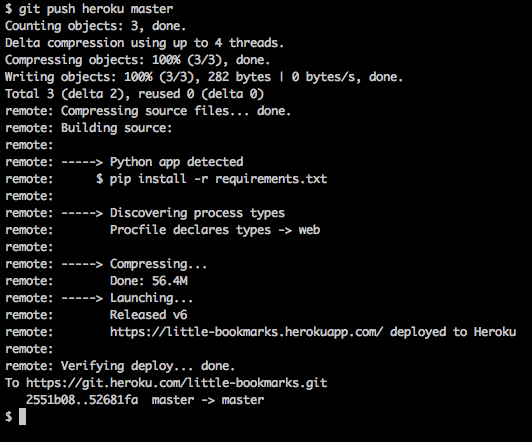
Here, I'm pushing my bookmark server to Heroku using Git.
The ``git push`` command bundles up the app and sends it to Heroku, which deploys it on the web.

If all goes well, your app will now be accessible on the web! The URI appears in the output from the ``git`` command.

### Accessing server logs

If your app doesn't work quite right as deployed, one resource that can be very helpful is the server log. Since your service isn't running on your own local machine any more, those logs aren't going to show up in your terminal! Instead, they're available from the Heroku dashboard.

Take a look at https://dashboard.heroku.com/apps/little-bookmarks/logs, but replace __"little-bookmarks"__ with your own app's name.

### Deploying your service
Mark each of these steps as you complete them.
* I have committed my server code to a Git repository.
* I have signed up for a Heroku account and installed the CLI
* I have added a ``runtime.txt`` for Python3
* I have added a ``requirements.txt`` with ``requests``
* I have added a ``Procfile`` with the ``web`` process defined.
* I have changed my server code to listen on a port defined by the environment
* I have committed these changes to my Git repository.
* I have logged into Heroku from the commmand line and pushed my app.
* I have tested it and works!

## CHAPTER 2: Handling more requests

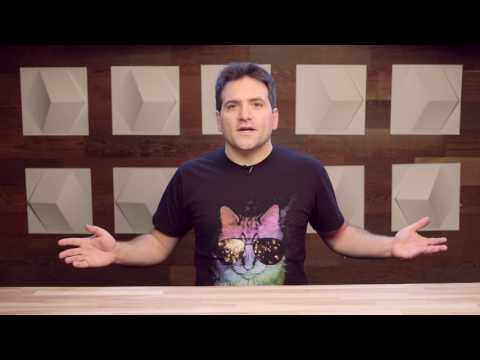

In [3]:
id = 'PqD1YN-pQ1g'
YouTubeVideo(id=id, width=600)

### Handling more requests

Try creating a link in it where the target URI is the bookmark server's own URI. What happens when you try to do that?
Looking at the bookmark server I've deployed on Heroku.

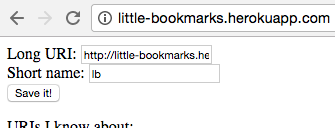
*Looking at the bookmark server I've deployed on Heroku. I'm about to submit the bookmark server's own URI in the form.*

When I do this, the app gives me an error, saying it can't fetch that web page. That's weird! The server is right there; it should be able to reach itself! What do you think is going on here?

### Question 1 of 2
Why can't the bookmark server fetch a page from itself?
#### Answer:
``http.server`` can only handle one request at a time.

### Concurrency
Being able to handle two ongoing tasks at the same time is called concurrency, and the basic ``http.server.HTTPServer`` doesn't have it. It's pretty straightforward to plug concurrency support into an ``HTTPServer``, though. The Python standard library supports doing this by adding a mixin to the ``HTTPServer`` class. A mixin is a sort of helper class, one that adds extra behavior the original class did not have. To do this, you'll need to add this code to your bookmark server:
```python
import threading
from socketserver import ThreadingMixIn

class ThreadHTTPServer(ThreadingMixIn, http.server.HTTPServer):
    "This is an HTTPServer that supports thread-based concurrency."
```
Then look at the bottom of your bookmark server code, where it creates an ``HTTPServer``. Have it create a ``ThreadHTTPServer`` instead:
```python
if __name__ == '__main__':
    port = int(os.environ.get('PORT', 8000))
    server_address = ('', port)
    httpd = ThreadHTTPServer(server_address, Shortener)
    httpd.serve_forever()
```
Commit this change to your Git repository, and push it to Heroku. Now when you test it out, you should be able to add an entry that points to the service itself.

### Question 2 of 2
Try posting an entry to your bookmark server that points to the server itself now. Did it work? If so, the server is now able to handle a second incoming request while processing another request.
#### Answer:
* Yes, it worked!

## CHAPTER 3: What's an Apache or Nginx?

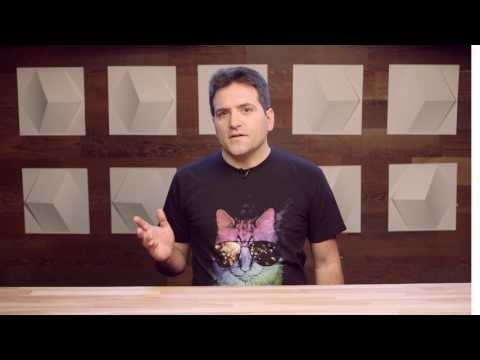

In [4]:
id = '_6JAlwW3E7o'
YouTubeVideo(id=id, width=600)

### Static content and more

The Web was originally designed to serve documents, not to deliver applications. Even today, a large amount of the data presented on any web site is static content — images, HTML files, videos, downloadable files, and other media stored on disk.

Specialized web server programs — like [Apache](https://httpd.apache.org/), [Nginx](https://www.nginx.com/resources/wiki/), or [IIS](https://www.iis.net/) — can serve static content from disk storage very quickly and efficiently. They can also provide access control, allowing only authenticated users to download particular static content.

### Routing and load balancing

Some web applications have several different server components, each running as a separate process. One thing a specialized web server can do is dispatch requests to the particular backend servers that need to handle each request. There are a lot of names for this, including request routing and *reverse proxying*.

Some web applications need to do a lot of work on the server side for each request, and need many servers to handle the load. Splitting requests up among several servers is called load balancing.

Load balancing also helps handle conditions where one server becomes unavailable, allowing other servers to pick up the slack. A reverse proxy can health check the backend servers, only sending requests to the ones that are currently up and running. This also makes it possible to do updates to the backend servers without having an outage.

### Concurrent users

Handling a large number of network connections at once turns out to be complicated — even more so than plugging concurrency support into your Python web service.

As you may have noticed in your own use of the web, it takes time for a server to respond to a request. The server has to receive and parse the request, come up with the data that it needs to respond, and transmit the response back to the client. The network itself is not instantaneous; it takes time for data to travel from the client to the server.

In addition, a browser is totally allowed to open up multiple connections to the same server, for instance to request resources such as images, or to perform API queries.

All of this means that if a server is handling many requests per second, there will be many requests in progress at once — literally, at any instant in time. We sometimes refer to these as in-flight requests, meaning that the request has "taken off" from the client, but the response has not "landed" again back at the client. A web service can't just handle one request at a time and then go on to the next one; it has to be able to handle many at once.

### Question 1 of 2

In September 2016, the English Wikipedia received about 250 million page views per day. That's an average of about __2,900 page views every second__. Let's imagine that an average page view involves __three__ HTTP queries (the page HTML itself and two images), and that each HTTP query takes __0.1 seconds__ (or 100 milliseconds) to serve. About how many requests are in flight at any instant?
#### Answer:
Between 100 and 1,000

### Caching

Imagine a web service that does a lot of complicated processing for each request — something like calculating the best route for a trip between two cities on a map. Pretty often, users make the same request repeatedly: imagine if you load up that map, and then you reload the page — or if someone else loads the same map. It's useful if the service can avoid recalculating something it just figured out a second ago. It's also useful if the service can avoid re-sending a large object (such as an image) if it doesn't have to.

One way that web services avoid this is by making use of a cache, a temporary storage for resources that are likely to be reused. Web systems can perform caching in a number of places — but all of them are under control of the server that serves up a particular resource. That server can set HTTP headers indicating that a particular resource is not intended to change quickly, and can safely be cached.

There are a few places that caching usually can happen. Every user's browser maintains a browser cache of cacheable resources — such as images from recently-viewed web pages. The browser can also be configured to pass requests through a web proxy, which can perform caching on behalf of many users. Finally, a web site can use a reverse proxy to cache results so they don't need to be recomputed by a slower application server or database.

All HTTP caching is supposed to be governed by cache control headers set by the server. You can read a lot more about them in [this article](https://developers.google.com/web/fundamentals/performance/optimizing-content-efficiency/http-caching) by Google engineer Ilya Grigorik.

### Capacity

Why serve static requests out of cache (or a static web server) rather than out of your application server? Python code is totally capable of sending images or video via HTTP, after all. The reason is that — all else being equal — handling a request faster provides a better user experience, but also makes it possible for your service to support more requests.

If your web service becomes popular, you don't want it to bog down under the strain of more traffic. So it helps to handle different kinds of request with software that can perform that function quickly and efficiently.

### Question 2 of 2
Imagine that you have a service that is handling 6,000 requests per second. One-third of its of requests are for the site's CSS file, which doesn't change very often. So browsers shouldn't need to fetch it every time they load the site. If you tell the browser to cache the CSS, 1% of visitors will need to fetch it. After this change, about how many requests will the service be getting?
#### Answer:
About 4,020 requests per second

## CHAPTER 4: Cookies

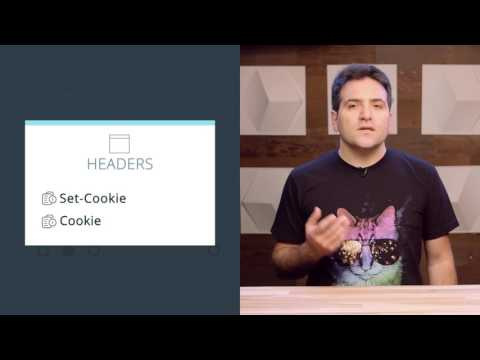

In [5]:
id = '433Qt1pIegU'
YouTubeVideo(id=id, width=600)

### Cookies

Cookies are a way that a server can ask a browser to retain a piece of information, and send it back to the server when the browser makes subsequent requests. Every cookie has a name and a value, much like a variable in your code; it also has rules that specify when the cookie should be sent back.

What are cookies for? A few different things. If the server sends each client a unique cookie value, it can use these to tell clients apart. This can be used to implement higher-level concepts on top of HTTP requests and responses — things like sessions and login. Cookies are used by analytics and advertising systems to track user activity from site to site. Cookies are also sometimes used to store user preferences for a site.

### How cookies happen
The first time the client makes a request to the server, the server sends back the response with a __Set-Cookie__ header. This header contains three things: a cookie name, a value, and some attributes. Every subsequent time the browser makes a request to the server, it will send that cookie back to the server. The server can update cookies, or ask the browser to expire them.

### Seeing cookies in your browser

Browsers don't make it easy to find cookies that have been set, because removing or altering cookies can affect the expected behavior of web services you use. However, it is possible to inspect cookies from sites you use in every major browser. Do some research on your own to find out how to view the cookies that your browser is storing.

Here's a cookie that I found in my Chrome browser, from a web site I visited:

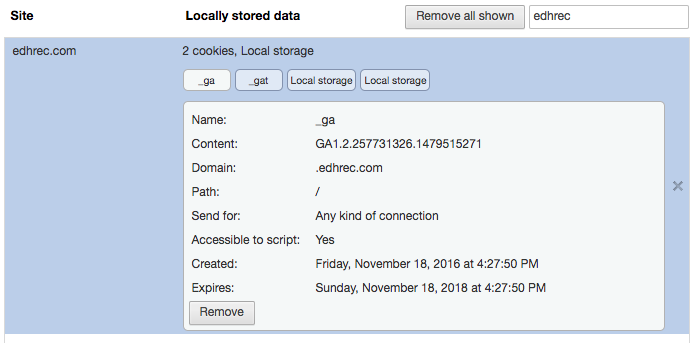
*A cookie displayed in my Chrome browser.*

What are all these pieces of data in my cookie? There are eight different fields there!
>
>    *By the way, if you try to research "cookie fields" with a web search, you may get a lot of results from the Mrs. Fields cookie company. Try "HTTP cookie fields" for more relevant results.*
>

The first two, the cookie's name and content, are also called its key and value. They're analogous to a dictionary key and value in Python — or a variable's name and value for that matter. They will both be sent back to the server. There are some syntactic rules for which characters are allowed in a cookie name; for instance, they can't have spaces in them. The value of the cookie is where the "real data" of the cookie goes — for instance, a unique token representing a logged-in user's session.

The next two fields, Domain and Path, describe the scope of the cookie — that is to say, which queries will include it. By default, the domain of a cookie is the hostname from the URI of the response that set the cookie. But a server can also set a cookie on a broader domain, within limits. For instance, a response from ``www.udacity.com`` can set a cookie for ``udacity.com``, but not for ``com``.

The fields that Chrome describes as "Send for" and "Accessible to script" are internally called Secure and HttpOnly, and they are boolean flags (true or false values). The internal names are a little bit misleading. If the Secure flag is set, then the cookie will only be sent over HTTPS (encrypted) connections, not plain HTTP. If the HttpOnly flag is set, then the cookie will not be accessible to JavaScript code running on the page.

Finally, the last two fields deal with the lifetime of the cookie — how long it should last. The creation time is just the time of the response that set the cookie. The expiration time is when the server wants the browser to stop saving the cookie. There are two different ways a server can set this: it can set an Expires field with a specific date and time, or a Max-Age field with a number of seconds. If no expiration field is set, then a cookie is expired when the browser closes.

### Using cookies in Python

To set a cookie from a Python HTTP server, all you need to do is set the ``Set-Cookie`` header on an HTTP response. Similarly, to read a cookie in an incoming request, you read the ``Cookie`` header. However, the format of these headers is a little bit tricky; I don't recommend formatting them by hand. Python's ``http.cookies`` module provides handy utilities for doing so.

To create a cookie on a Python server, use the ``SimpleCookie`` class. This class is based on a dictionary, but has some special behavior once you create a key within it:
```python
from http.cookies import SimpleCookie, CookieError

out_cookie = SimpleCookie()
out_cookie["bearname"] = "Smokey Bear"
out_cookie["bearname"]["max-age"] = 600
out_cookie["bearname"]["httponly"] = True
```
Then you can send the cookie as a header from your request handler:
```python
self.send_header("Set-Cookie", out_cookie["bearname"].OutputString())
```
To read incoming cookies, create a ``SimpleCookie`` from the ``Cookie `` header:
```python
in_cookie = SimpleCookie(self.headers["Cookie"])
in_data = in_cookie["bearname"].value
```
Be aware that a request might not have a cookie on it, in which case accessing the ``Cookie`` header will raise a ``KeyError`` exception; or the cookie might not be valid, in which case the ``SimpleCookie`` constructor will raise ``http.cookies.CookieError``.
>
>    *__Important safety tip__: Even though browsers make it difficult for users to modify cookies, it's possible for a user to modify a cookie value. Higher-level web toolkits, such as Flask (in Python) or Rails (in Ruby) will cryptographically sign your cookies so that they won't be accepted if they are modified. Quite often, high-security web applications use a cookie just to store a session ID, which is a key to a server-side database containing user information.*
>
>    *__Another important safety tip__: If you're displaying the cookie data as HTML, you need to be careful to escape any HTML special characters that might be in it. An easy way to do this in Python is to use the ``html.escape`` function, from the built-in ``html`` module!*
>

For a lot more information on cookie handling in Python, see [the documentation for the ``http.cookies`` module](https://docs.python.org/3/library/http.cookies.html).

### Exercise: A server that remembers you

In this exercise, you'll build a server that asks for your name, and then stores your name in a cookie on your browser. You'll be able to see that cookie in your browser's cookie data. Then when you visit the server again, it'll already know your name.

The starter code for this exercise is in ``Lesson-3/2_CookieServer.``

### A server that remembers you
Check off these steps as you complete them in the exercise.
Task List:
* In the ``do_POST`` method, set the cookie fields: its value, domain (localhost) and max-age
* In the ``do_GET`` method, extract and decode the returned cookie value.
* Run the cookie server and test it in your browser at http://localhost:8000
* Run the ``test.py`` script to test the running server.
* Inspect your browser's cookies for the ``localhost`` domain and find the cookie your server created!

### How it looks on my browser

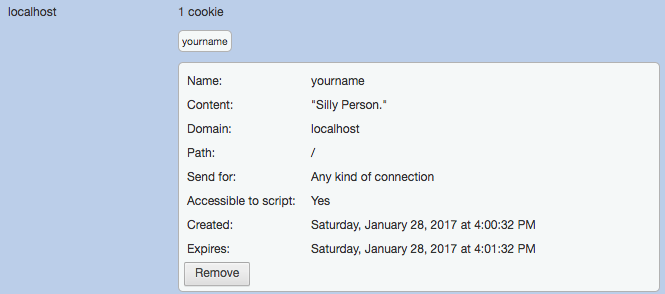
*A cookie from ``localhost`` ...*

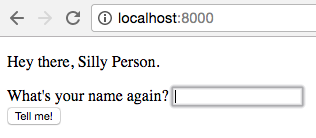
*... and a server that recognizes it.*

### DNS domains and cookie security

Back in Lesson 1, you used the ``host`` or ``nslookup`` command to look up the IP addresses of a few different web services, such as Wikipedia and your own ``localhost``. But domain names play a few other roles in HTTP besides just being easier to remember than IP addresses. A DNS domain links a particular hostname to a computer's IP address. But it also indicates that the owner of that domain intends for that computer to be treated as part of that domain.

Imagine what a bad guy could do if they could convince your browser that their server ``evilbox`` was part of (say) Facebook, and get you to request a Facebook URL from ``evilbox`` instead of from Facebook's real servers. Your browser would send your ``facebook.com`` cookies to ``evilbox`` along with that request. But these cookies are what prove your identity to Facebook … so then the bad guy could use those cookies to access your Facebook account and send spam messages to all your friends.

In the immortal words of Dr. Egon Spengler: It would be bad.

This is just one reason that DNS is essential to web security. If a bad guy can take control of your site's DNS domain, they can send all your web traffic to their evil server … and if the bad guy can fool users' browsers into sending that traffic their way, they can steal the users' cookies and reuse them to break into those users' accounts on your site.


## CHAPTER 5: HTTPS for security

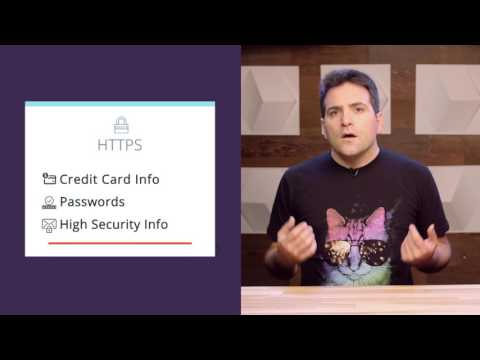

In [6]:
id = '3mcIibq61wA'
YouTubeVideo(id=id, width=600)

### What HTTPS does for you

When a browser and a server speak HTTPS, they're just speaking HTTP, but over an encrypted connection. The encryption follows a standard protocol called [Transport Layer Security](https://en.wikipedia.org/wiki/Transport_Layer_Security), or TLS for short. TLS provides some important guarantees for web security:

* It keeps the connection __private__ by encrypting everything sent over it. Only the server and browser should be able to read what's being sent.
* It lets the browser __authenticate__ the server. For instance, when a user accesses https://www.udacity.com/, they can be sure that the response they're seeing is really from Udacity's servers and not from an impostor.
* It helps protect the __integrity__ of the data sent over that connection — checking that it has not been (accidentally or deliberately) modified or replaced.
>
>   *__Note__: TLS is also very often referred to by the older name SSL (Secure Sockets Layer). Technically, SSL is an older version of the encryption protocol. This course will talk about TLS because that's the current standard.*
>

### Question 1 of 4

Here are a few different malicious things that an attacker could do to normal HTTP traffic. Each of the three guarantees (privacy, authenticity, and integrity) helps defend against one of them. Match them up!
#### Answer:
Attack
(You're reading your email in a coffee shop, and the shop owner can read your email off of their Wi-Fi network you're using.)
Defense
(Privacy)

--------------------------------------------------------------------
Attack
(You think you're logging into Facebook, but actually you're sending your Facebook password to a server in the coffee shop's back room.)
Defense
(Authenticity)

----------------------------------------------------------------------
Attack
(The coffee shop owner doesn't like cat pictures, so they replace all the cat pictures on the web pages you're looking at with pictures of celery.)
Defense
(Integrity)


### Inspecting TLS on your service

If you deployed a web service on Heroku earlier in this lesson, then HTTPS should already be set up. The URI that Heroku assigned to your app was something like https://yourappname.herokuapp.com/.

From there, you can use your browser to see more information about the HTTPS setup for this site. However, the specifics of where to find this information will depend on your browser. You can experiment to find it, or you can check the documentation: [Chrome](https://support.google.com/chrome/answer/95617), [Firefox](https://support.mozilla.org/en-US/kb/secure-website-certificate), [Safari](https://support.apple.com/guide/safari/avoid-fraud-by-using-encrypted-websites-sfri40697/mac).
>
>    *__Note__: In some browser documentation you'll see references to SSL certificates. These are the same as TLS certificates. Remember, SSL is just the older version of the encryption standard.*
>

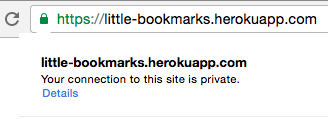
*Most browsers have a lock icon next to the URI when you're viewing an HTTPS web site. Clicking on the lock is how you start exploring the details of the HTTPS connection. Here, I've clicked on the lock on my bookmark server deployed on Heroku.*

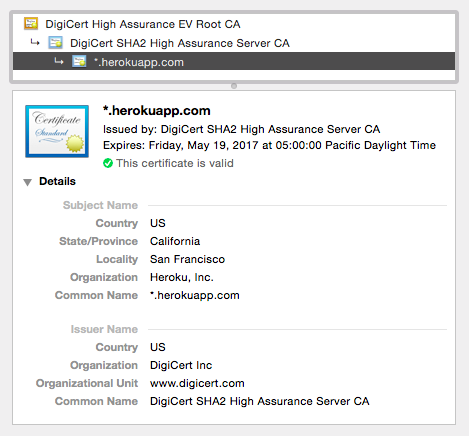
*Viewing TLS certificate details for the ``*.herokuapp.com`` certificate in Google Chrome.*

### What does it mean?

Well, there are a lot of locks in these pictures. Those are how the browser indicates to the user that their connection is being protected by TLS. However, these dialogs also show a little about the server's TLS setup.

### Keys and certificates

The server-side configuration for TLS includes two important pieces of data: a __private key__ and a __public certificate__. The private key is secret; it's held on the server and never leaves there. The certificate is sent to every browser that connects to that server via TLS. These two pieces of data are mathematically related to each other in a way that makes the encryption of TLS possible.

The server's certificate is issued by an organization called a __certificate authority__ (CA). The certificate authority's job is to make sure that the server really is who it says it is — for instance, that a certificate issued in the name of Heroku is actually being used by the Heroku organization and not by someone else.

The role of a certificate authority is kind of like getting a document notarized. A notary public checks your ID and witnesses you sign a document, and puts their stamp on it to indicate that they did so.

### Question 2 of 4

Take a look at the TLS certificate presented for your deployed app, or the screenshots above from my version of it. What organization was this server certificate issued to? Who issued it?
#### Answer:
It was issued to __Heroku__, and the issuer is __DigiCert__.

### How does TLS assure privacy?

The data in the TLS certificate and the server's private key are mathematically related to each other through a system called [public-key cryptography](https://en.wikipedia.org/wiki/Public-key_cryptography). The details of how this works are way beyond the scope of this course. The important part is that the two endpoints (the browser and server) can securely agree on a shared secret which allows them to scramble the data sent between them so that only the other endpoint — and not any eavesdropper — can unscramble it.

### How does TLS assure authentication?

A server certificate indicates that an encryption key belongs to a particular organization responsible for that service. It's the job of a certificate authority to make sure that they don't issue a cert for (say) __udacity.com__ to someone other than the company who actually runs that domain.

But the cert also contains metadata that says what DNS domain the certificate is good for. The cert in the picture above is only good for sites in the __.herokuapp.com__ domain. When the browser connects to a particular server, if the TLS domain metadata doesn't match the DNS domain, the browser will reject the certificate and put up a big scary warning to tell the user that something fishy is going on.

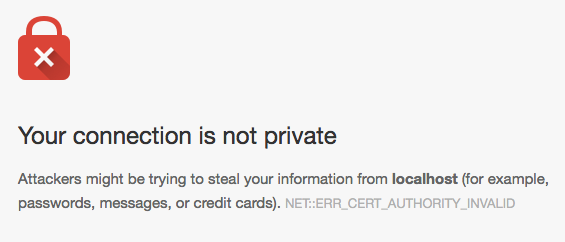
*The big scary warning that Chrome displays if a TLS certificate is not valid.*

### How does TLS assure integrity?

Every request and response sent over a TLS connection is sent with a message authentication code (MAC) that the other end of the connection can verify to make sure that the message hasn't been altered or damaged in transit.

### Question 3 of 4
Suppose that an attacker were able to trick your browser into sending your __udacity.com__ requests to the attacker's server instead of Udacity's real servers. What could the attacker do with that evil ability?
#### Answer:
* Steal your ``udacity.com`` cookies, use them to log into the real site as you, and post terrible spam to the discussion forums.
* Make this course appear with terrible images in it instead of nice friendly ones.

### Question 4 of 4
When your browser talks to your deployed service over HTTPS, there are still some ways that an attacker could spy on the communication. Mark the cases that HTTPS __does not__ protect against:
#### Answer:
* A malicious program on your computer taking a screenshot of your browser.
* An attacker guessing your Heroku password and replacing your service with a malicious one.
* An attacker who had broken into Heroku's servers themselves.

## CHAPTER 6: Beyond GET and POST

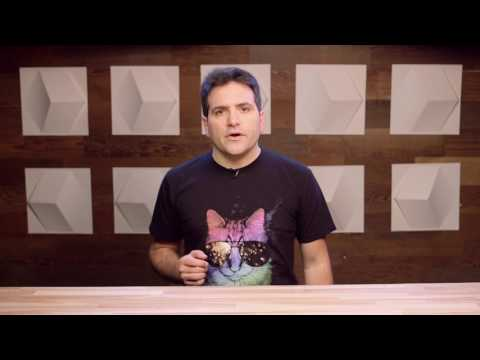

In [7]:
id = 'CVDXOxVp0fw'
YouTubeVideo(id=id, width=600)

### All of the other methods

The different HTTP methods each stand for different actions that a client might need to perform upon a server-hosted resource. Unlike ``GET`` and ``POST``, their usage isn't built into the normal operation of web browsers; following a link is always going to be a ``GET`` request, and the default action for submitting an HTML form will always be a ``GET`` or ``POST`` request.

However, other methods are available for web APIs to use, for instance from client code in JavaScript. If you want to use other methods in your own full-stack applications, you'll have to write both server-side code to accept them, and client-side JavaScript code to make use of them.

### ``PUT`` for creating resources

The HTTP ``PUT`` method can be used for creating a new resources. The client sends the URI path that it wants to create, and a piece of data in the request body. A server could implement`` PUT`` in a number of different ways — such as storing a file on disk, or adding records to a database. A server should respond to a ``PUT ``request with a ``201 Created`` status code, if the ``PUT`` action completed successfully. After a successful ``PUT``, a ``GET`` request to the same URI should return the newly created resource.

### Question 1 of 3
``PUT`` can be used for actions such as uploading a file to a web site. However, it's not the most common way to do file uploads. ``PUT`` has to be done in application code (e.g. JavaScript), whereas with another method it's possible to do uploads with just HTML on the client side. What method do you think this describes?
#### Answer
POST


### ``DELETE`` for, well, deleting things

The destructive counterpart to ``PUT`` is ``DELETE``, for removing a resource from the server. After a DELETE has happened successfully, further ``GET`` requests for that resource will yield ``404 Not Found`` ... unless, of course, a new resource is later created with the same name!

### Question 2 of 3
What's something that we would almost always want the client to do before allowing it to delete resources in your application?
#### Answer
Log in, or otherwise authenticate

### `PATCH` for making changes
The ``PATCH`` method is a relatively new addition to HTTP. It expresses the idea of patching a resource, or changing it in some well-defined way. (If you've used Git, you can think of patching as what applying a Git commit does to the files in a repository.)

However, just as HTTP doesn't specify what format a resource has to be in, it also doesn't specify in what format a patch can be in: how it should represent the changes that are intended to be applied. That's up to the application to decide. An application could send diffs over HTTP ``PATCH`` requests, for instance. One standardized format for ``PATCH`` requests is the [JSON Patch](http://jsonpatch.com/) format, which expresses changes to a piece of JSON data. A different one is [JSON Merge Patch](https://tools.ietf.org/html/rfc7386).

### ``HEAD``, ``OPTIONS``, ``TRACE`` for debugging

There are a number of additional methods that HTTP supports for various sorts of debugging and examining servers.

* [HEAD] works just like [GET], except the server doesn't return any content — just headers.
* [OPTIONS] can be used to find out what features the server supports.
* [TRACE] echoes back what the server received from the client — but is often disabled for security reasons.

### Question 3 of 3

If HTTP methods are the "verbs" in the protocol, what are the "objects" (in the grammatical sense)?
#### Answer:
``URIs (e.g. https://en.wikipedia.org/wiki/Transport_Layer_Security)``

### Great responsibility

HTTP can't prevent a service from using methods to mean something different from what they're intended to mean, but this can have some surprising effects. For instance, you could create a service that used a GET request to delete content. However, web clients don't expect GET requests to have side-effects like that. In one famous case from 2006, an organization put up a web site where "edit" and "delete" actions happened through GET requests, and the result was that [the next search-engine web crawler to come along deleted the whole site](http://thedailywtf.com/articles/The_Spider_of_Doom).

### The standard tells all

For much more about HTTP methods, consult the [HTTP standards documents](https://www.w3.org/Protocols/rfc2616/rfc2616-sec9.html).


## CHAPTER 7: New developments in HTTP

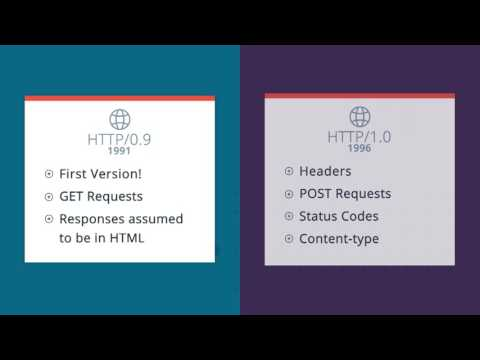

In [8]:
id = '9e8uLYOXTjA'
YouTubeVideo(id=id, width=600)

### HTTP/2

The new version of HTTP is called HTTP/2. It's based on earlier protocol work done at Google, under the name SPDY (pronounced "speedy").

**Unfortunately, we can't show you very much about HTTP/2 in Python, because the libraries for it are not very mature yet (as of early 2017)**. We'll still take a look at the motivations for the changes that HTTP/2 brings, though.

Some other languages are a little bit more up to the minute; one of the best demonstrations of HTTP/2's advantages is [in the Gophertiles demo](https://http2.golang.org/gophertiles) from the makers of the Go programming language. In order to see the effects, you'll need to be using a browser that supports HTTP/2. Check [CanIUse.com](https://caniuse.com/#feat=http2) to check that your browser does!

This demo lets you load the same web page over HTTP/1.1 and HTTP/2. It also lets you add extra latency (delay) to each request, simulating what happens when you access a server that's far away or when you're on a slow network. The latency options are zero (no extra latency), 30 milliseconds, 200 milliseconds, and one second. Try it out!
Gophertiles demo with some tiles loaded and some not loaded.

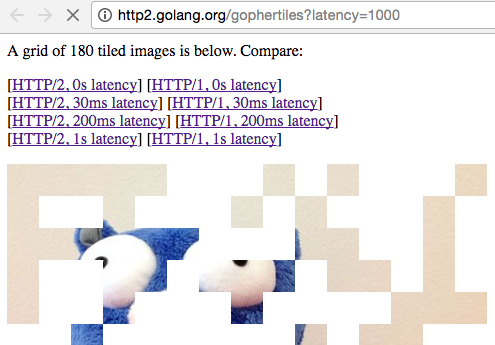
*A partly-loaded Gophertiles demo, using HTTP/1 with server latency of 1 second.*

### Quiz Question
In the Gophertiles demo, try the HTTP/2 and HTTP/1 links with 1 second of latency. What do you notice about the time it takes to load all the images?
#### Answer:
* HTTP/2 loads much more quickly than HTTP/1.

### Other HTTP/2 demos
You don't have to take the Go folks' word for it, either; there's http://www.http2demo.io/ too, and also https://http2.akamai.com/demo. Each of these demos works similarly to the Gophertiles demo, and will show you much the same effects. The HTTP/2 one is (on average) a whole lot faster, especially with high latency.

But why is it faster? To answer that, we first need to look at some browser behavior in HTTP/1.1.


### Exercise: Multiple connections

Since the early days of HTTP, browsers have kept open multiple connections to a server. This lets the browser fetch several resources (such as images, scripts, etc.) in parallel, with less waiting. However, the browser only opens up a small number of connections to each server. And in HTTP/1.1, each connection can only request a single resource at a time.

As an exercise, take a look at the server in ``Lesson-3/3_Parallelometer``. Try running this server on your computer and accessing it at http://localhost:8000 to see parallel requests happening. The code here is based on the threading server that you've seen earlier in this lesson.

Depending on your browser, you may see different numbers, but most likely the biggest one you'll see is 6. Common browsers such as Chrome, Firefox, and Safari open up as many as six connections to the same server. And under HTTP/1.1, only one request can effectively be in flight per connection, which means that they can only have up to six requests in flight with that server at a time.

### Multiplexing

But if you're requesting hundreds of different tiny files from the server — as in this demo or the Gophertiles demo — it's kind of limiting to only be able to fetch six at a time. This is particularly true when the latency (delay) between the server and browser gets high. The browser can't start fetching the seventh image until it's fully loaded the first six. The greater the latency, the worse this affects the user experience.

HTTP/2 changes this around by multiplexing requests and responses over a single connection. The browser can send several requests all at once, and the server can send responses as quickly as it can get to them. There's no limit on how many can be in flight at once.

And that's why the Gophertiles demo loads much more quickly over HTTP/2 than over HTTP/1.

### Server push

When you load a web page, your browser first fetches the HTML, and then it goes back and fetches other resources such as stylesheets or images. But if the server already knows that you will want these other resources, why should it wait for your browser to ask for them in a separate request? HTTP/2 has a feature called [server push](https://en.wikipedia.org/wiki/HTTP/2_Server_Push) which allows the server to say, effectively, "If you're asking for ``index.html``, I know you're going to ask for ``style.css`` too, so I'm going to send it along as well."

### Encryption

The HTTP/2 protocol was being designed around the same time that web engineers were getting even more interested in encrypting all traffic on the web for privacy reasons. Early drafts of HTTP/2 proposed that encryption should be required for sites to use the new protocol. This ended up being removed from the official standard … but most of the browsers did it anyway! Chrome, Firefox, and other browsers will only attempt HTTP/2 with a site that is using TLS encryption.

### Many more features

Now you have a sense of where HTTP development has been going in the past few years. You can read much more about HTTP/2 in the [HTTP/2 FAQ](https://http2.github.io/faq/).


## CHAPTER 13: Keep learning!

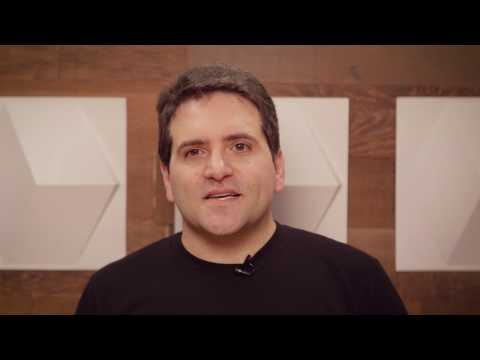

In [9]:
id = 'Zyn9jf9WpVM'
YouTubeVideo(id=id, width=600)

### Resources

Here are some handy resources for learning more about HTTP:

* [Mozilla Developer Network's HTTP index page](https://developer.mozilla.org/en-US/docs/Web/HTTP) contains a variety of tutorial and reference materials on every aspect of HTTP.
* The standards documents for HTTP/1.1 start at [RFC 7230](https://tools.ietf.org/html/rfc7230). The language of Internet standards tends to be a little difficult, but these are the official description of how it's supposed to work.
* The standards documents for HTTP/2 are at https://http2.github.io/.
* If you already run your own web site, [Let's Encrypt](https://letsencrypt.org/) is a great site to learn about HTTPS in a hands-on way, by creating your own HTTPS certificates and installing them on your site.
* [HTTP Spy](https://chrome.google.com/webstore/detail/http-header-spy/agnoocojkneiphkobpcfoaenhpjnmifb?hl=en) is a neat little Chrome extension that will show you the headers and request information for every request your browser makes.

